# Chapter 14. Introduction to Network Data
## Notebook for R

### 14.1 Representing and visualizing networks

In [2]:
library(glue)
library(igraph)

g1 = make_graph(edges=c("Hillary Clinton", "Donald Trump", "Bernie Sanders","Hillary Clinton", "Hillary Clinton", 
                        "Barack Obama", "John McCain", "Donald Trump"), directed = FALSE)
glue("Imaginary Facebook network of 5 American politicians")
print(g1)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




Imaginary Facebook network of 5 American politicians

IGRAPH 3507045 UN-- 5 4 -- 
+ attr: name (v/c)
+ edges from 3507045 (vertex names):
[1] Hillary Clinton--Donald Trump   Hillary Clinton--Bernie Sanders
[3] Hillary Clinton--Barack Obama   Donald Trump   --John McCain   


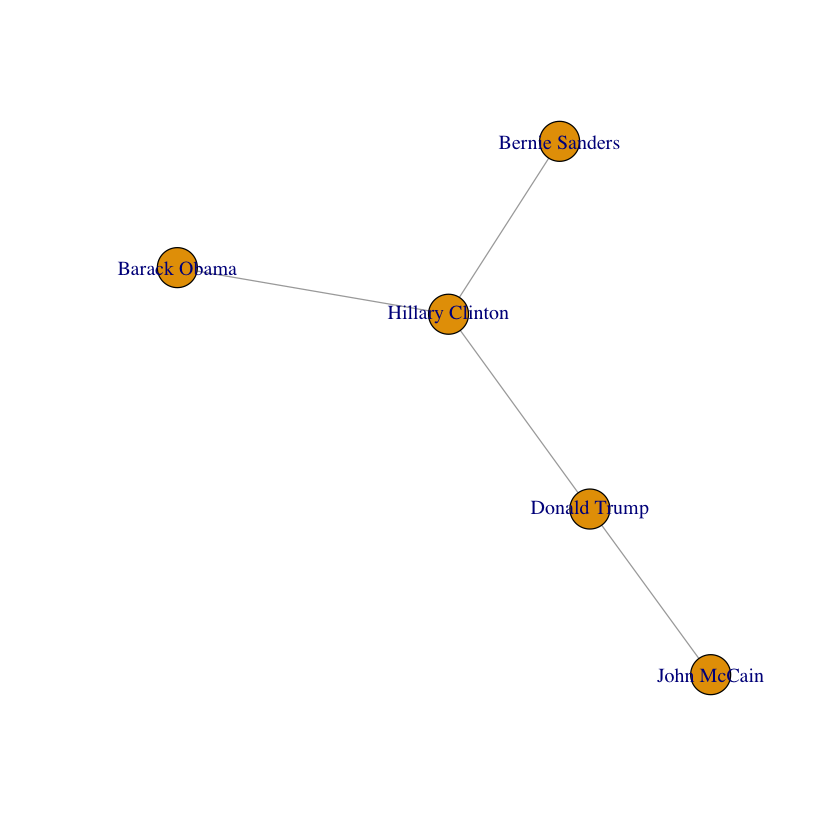

In [3]:
plot(g1)

In [4]:
g2 = make_graph(edges=c("Hillary Clinton", "Donald Trump", "Bernie Sanders","Hillary Clinton", "Hillary Clinton", 
                        "Barack Obama", "John McCain", "Donald Trump", "Barack Obama", "Hillary Clinton",
                       "Hillary Clinton", "Bernie Sanders"), directed = TRUE)
glue("Imaginary Twitter network of 5 American politicians")
print(g2)

Imaginary Twitter network of 5 American politicians

IGRAPH a189ff4 DN-- 5 6 -- 
+ attr: name (v/c)
+ edges from a189ff4 (vertex names):
[1] Hillary Clinton->Donald Trump    Bernie Sanders ->Hillary Clinton
[3] Hillary Clinton->Barack Obama    John McCain    ->Donald Trump   
[5] Barack Obama   ->Hillary Clinton Hillary Clinton->Bernie Sanders 


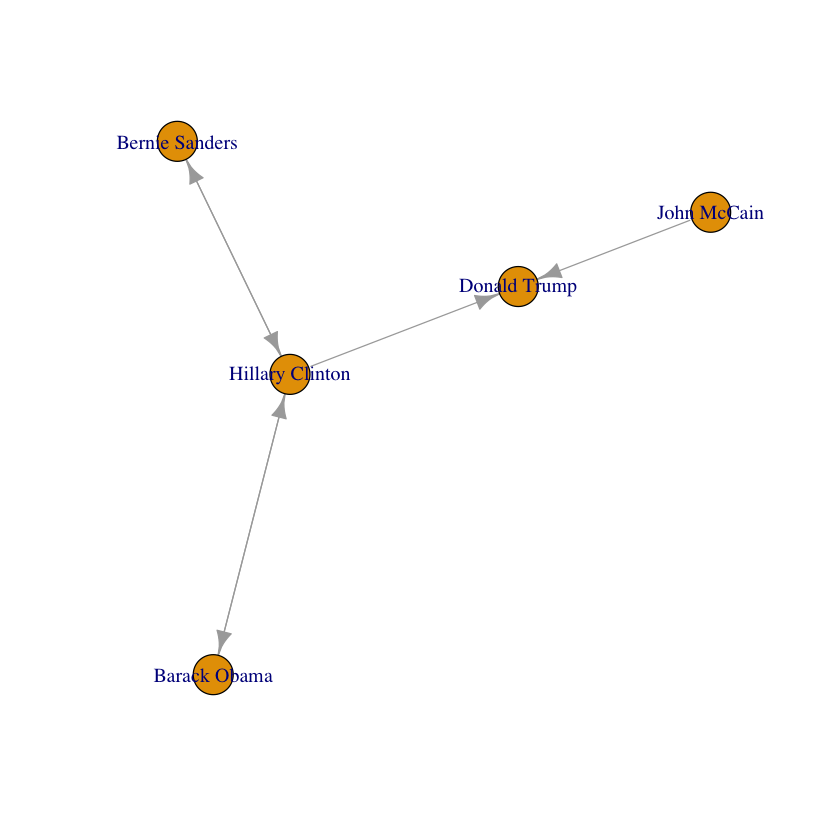

In [5]:
plot(g2)

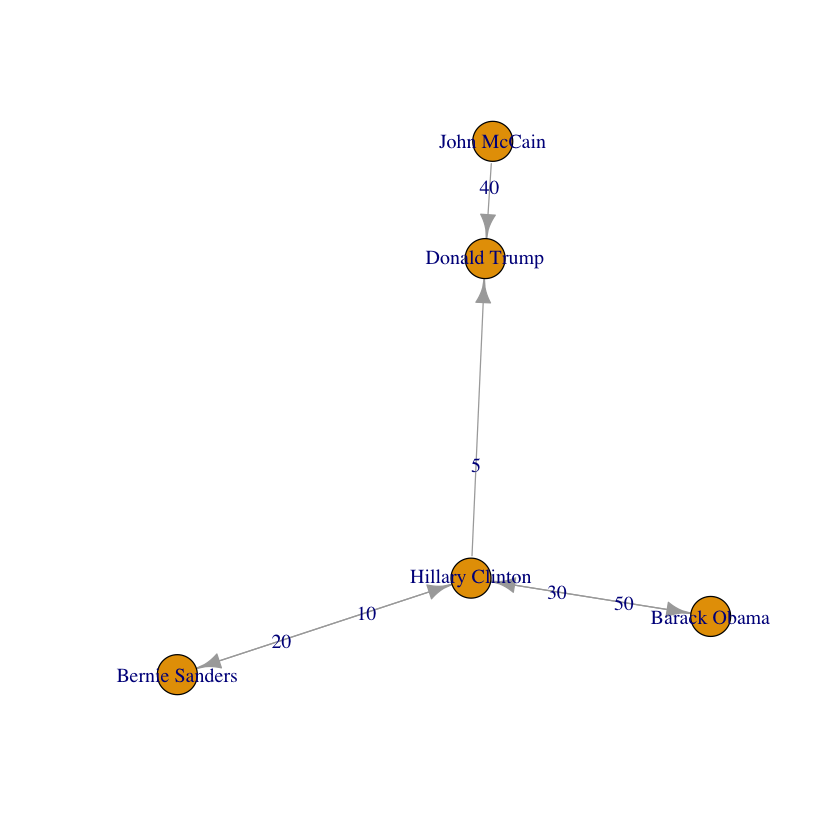

In [6]:
E(g2)$weight = c(5, 20, 30, 40, 50, 10)
plot(g2, edge.label = E(g2)$weight)

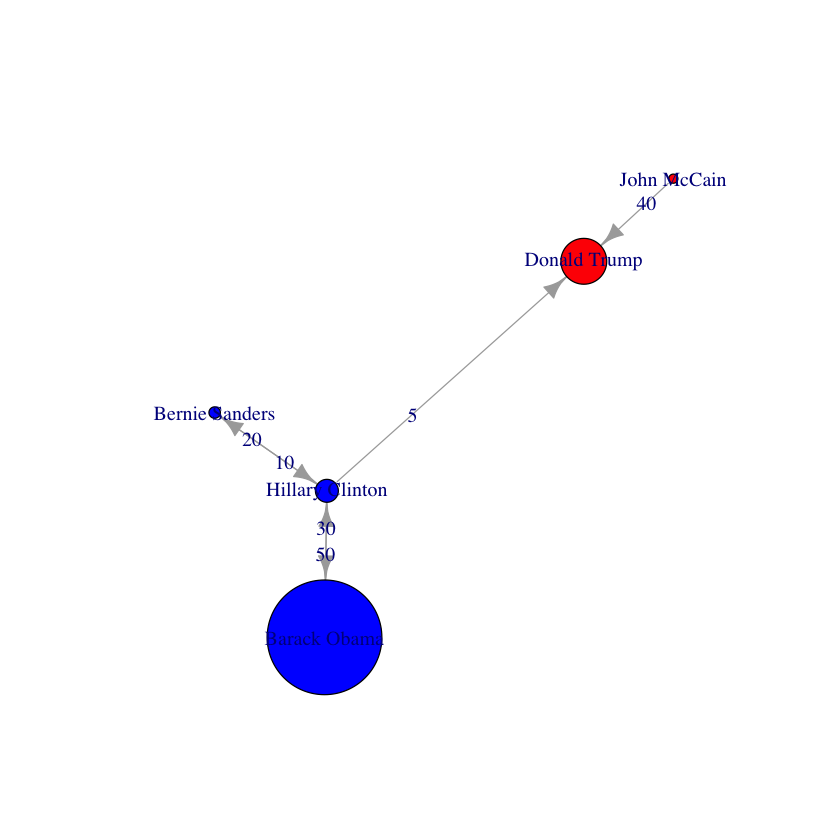

In [7]:
V(g2)$followers = c(100000, 200000, 50000, 500000, 40000)
V(g2)$party <- c("Democrat", "Republican", "Democrat", "Democrat", "Republican")
V(g2)$color = V(g2)$party
V(g2)$color = gsub("Democrat", "blue", V(g2)$color)
V(g2)$color = gsub("Republican", "red", V(g2)$color)
#vertex_attr(g2)
plot(g2, edge.label = E(g2)$weight, vertex.size = V(g2)$followers*0.0001)


In [8]:
g3 = induced_subgraph(g2, c(1,3,4))
glue("Democrats subgraph")
print(g3)
g4 = induced_subgraph(g2, c(2,5))
glue("Republicans subgraph")
print(g4)

Democrats subgraph

IGRAPH 0008717 DNW- 3 4 -- 
+ attr: name (v/c), followers (v/n), party (v/c), color (v/c), weight
| (e/n)
+ edges from 0008717 (vertex names):
[1] Bernie Sanders ->Hillary Clinton Hillary Clinton->Barack Obama   
[3] Barack Obama   ->Hillary Clinton Hillary Clinton->Bernie Sanders 


Republicans subgraph

IGRAPH e38343b DNW- 2 1 -- 
+ attr: name (v/c), followers (v/n), party (v/c), color (v/c), weight
| (e/n)
+ edge from e38343b (vertex names):
[1] John McCain->Donald Trump


In [9]:
edges = read.csv("http://cssbook.net/d/spanish_politicians_twitter_edges.csv", header=FALSE)
g5 = graph_from_data_frame(d=edges) 
glue("Nodes: ", gorder(g5), "  Edges: ", gsize(g5))

Nodes: 19515  Edges: 21498

### 14.2 Social network analysis

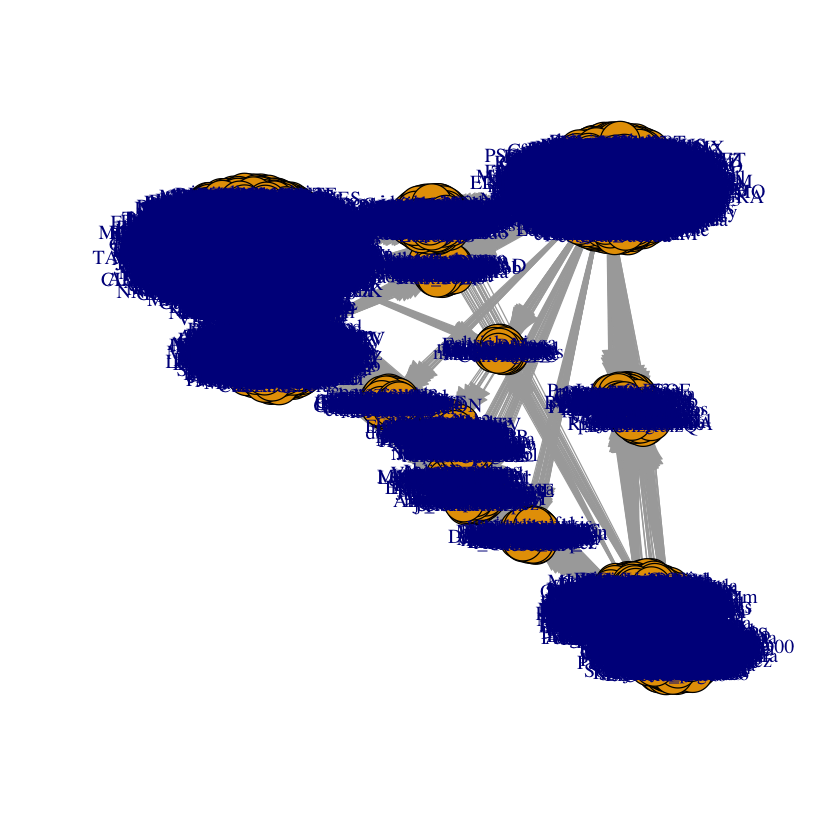

In [320]:
#plot(g5)